In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#can be reused for other scripts
def load_dataset(input_file,folder = "dataset/"):
    return pd.read_csv(folder+input_file,encoding='utf-8')


train = load_dataset('train.csv')


In [3]:
train.head(3)


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1


In [4]:

train = train.join(pd.get_dummies(train['source_system_tab'],prefix='source_system'))\
    .join(pd.get_dummies(train['source_type'],prefix='source_type'))\
    .join(pd.get_dummies(train['source_screen_name'],prefix='source_screen'))


In [77]:
members = load_dataset('members.csv')
members.head(2)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622


In [78]:
NumberOfTotalEvents = train.groupby('msno').size()
NumberOfPositive = train[train['target']== 1].groupby('msno').size()

In [79]:
#getting the total events per members
df = NumberOfTotalEvents.to_frame()
df['msno'] = df.index
df.index.name = None
df = pd.DataFrame(df.values)
df = df.rename(columns={0:'nb_events',1:'msno'})

In [80]:
#getting the total Positive events per members
df2 = NumberOfPositive.to_frame()
df2['msno'] = df2.index
df2.index.name = None
df2 = pd.DataFrame(df2.values)
df2 = df2.rename(columns={0:'positive_events',1:'msno'})

In [81]:
members_updated = members.join(df.set_index('msno'),on='msno').join(df2.set_index('msno'),on='msno')


In [82]:
members = members_updated
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,nb_events,positive_events
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,668,560
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,13,NaN
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,23,11
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907,8,NaN
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613,3,NaN


In [83]:
members['positive_events'] = members['positive_events'].fillna(0)

In [84]:
members['positive_ratio'] = members['positive_events'] / members['nb_events']
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,nb_events,positive_events,positive_ratio
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,668,560,0.838323
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,13,0,0
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,23,11,0.478261
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907,8,0,0
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613,3,0,0


/home/oscar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/oscar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


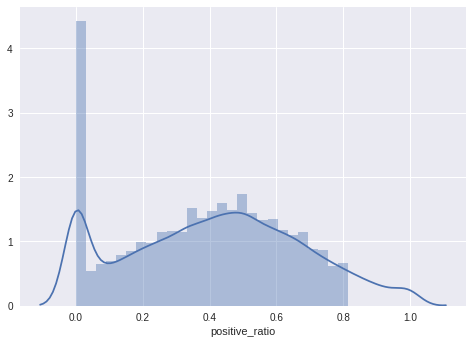

In [85]:
sns.distplot(members['positive_ratio']);

In [86]:
#INVESTIGATE THE ODD VALUES
noRatio = members[members['positive_ratio'] == 0]
noRatio.head()
print(noRatio.shape)

(3642, 10)


In [87]:
#Investigate low activity
lowActivity = members[members['nb_events'] <50]
lowActivity.shape

(10212, 10)

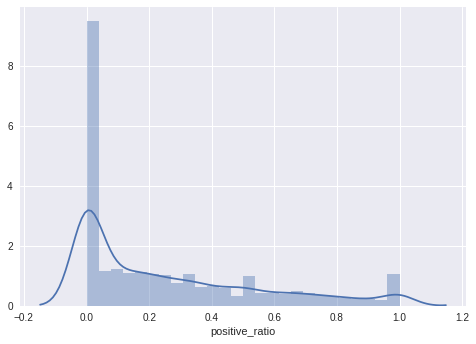

In [88]:
sns.distplot(lowActivity['positive_ratio']);

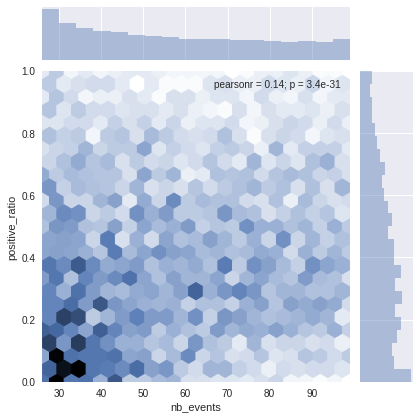

In [89]:
#Apparently the less events, the less positive the ratio is (for really low volume of events < 50)
sns.jointplot(x="nb_events", y="positive_ratio", data=members[(members['nb_events']>25) & (members['nb_events']<100) ],kind="hex")

In [90]:
train.head()

,msno,song_id,target,source_system_discover,source_system_explore,source_system_listen with,source_system_my library,source_system_notification,source_system_null,source_system_radio,...,source_screen_My library_Search,source_screen_Online playlist more,source_screen_Others profile more,source_screen_Payment,source_screen_Radio,source_screen_Search,source_screen_Search Home,source_screen_Search Trends,source_screen_Self profile more,source_screen_Unknown
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


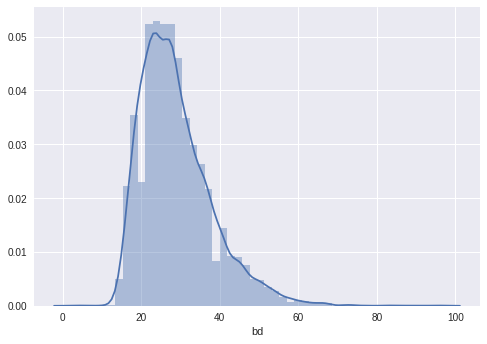

In [91]:
#maybe include age
sns.distplot(members[(members['bd']<100)&(members['bd']>0)]['bd'])

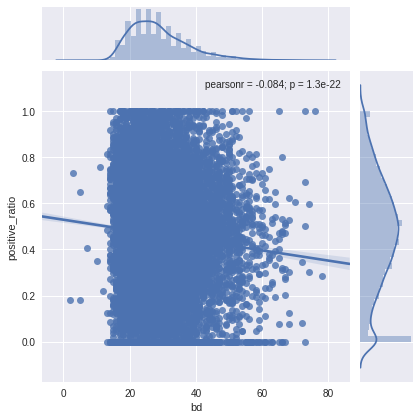

In [92]:
#apparently, the more old, the less target = 1
sns.jointplot(x="bd", y="positive_ratio", data=members[(members['bd'] < 80) & (members['bd'] > 0) & (members['nb_events'] > -1)],kind="reg")

In [23]:
del train['source_system_tab']
del train['source_screen_name']
del train['source_type']
train.head()

,msno,song_id,target,source_system_discover,source_system_explore,source_system_listen with,source_system_my library,source_system_notification,source_system_null,source_system_radio,...,source_screen_My library_Search,source_screen_Online playlist more,source_screen_Others profile more,source_screen_Payment,source_screen_Radio,source_screen_Search,source_screen_Search Home,source_screen_Search Trends,source_screen_Self profile more,source_screen_Unknown
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
songs = load_dataset('songs.csv')

In [67]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [94]:
#change age to average when odd
mean_age = int(members[(members['bd'] > 10) & (members['bd'] < 80)]['bd'].mean())
mean_age # 28.86 yold
members['bd'] = members['bd'].apply(lambda x: mean_age if (x < 10) or (x > 80) else x)


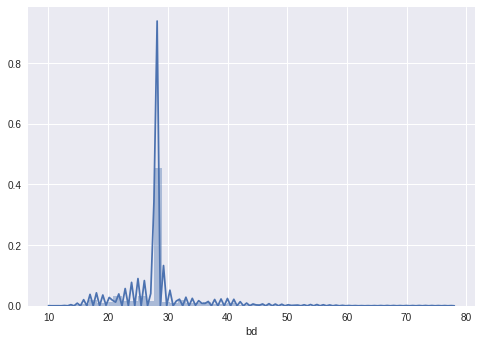

In [98]:
sns.distplot(members.bd)

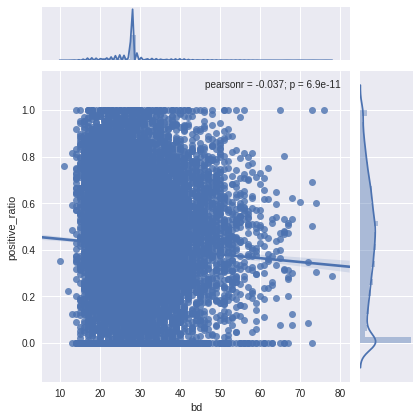

In [96]:
#replot with all values
sns.jointplot(x="bd", y="positive_ratio", data=members,kind="reg")

In [105]:
from sklearn.preprocessing import MinMaxScaler
MMScaler = MinMaxScaler(copy=True, feature_range=(0, 1))
MMScaler.fit(members['bd'])
members['bd'] = MMScaler.transform(members['bd'])
MMScaler.fit(members['nb_events'])
members['nb_events'] = MMScaler.transform(members['nb_events'])

/home/oscar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/oscar/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [104]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,nb_events,positive_events,positive_ratio
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0.264706,NaN,7,20110820,20170920,668,560,0.838323
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0.264706,NaN,7,20150628,20170622,13,0,0
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0.264706,NaN,4,20160411,20170712,23,11,0.478261
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0.264706,NaN,9,20150906,20150907,8,0,0
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0.264706,NaN,4,20170126,20170613,3,0,0
